In [1]:
import pandas as pd
import numpy as np

In [2]:
df1 = pd.read_excel("./Lab Session Data.xlsx", sheet_name = None)

In [3]:
df = df1['Purchase data'].iloc[:,0:5]
df

,Customer,Candies (#),Mangoes (Kg),Milk Packets (#),Payment (Rs)
0,C_1,20,6,2,386
1,C_2,16,3,6,289
2,C_3,27,6,2,393
3,C_4,19,1,2,110
4,C_5,24,4,2,280
5,C_6,22,1,5,167
6,C_7,15,4,2,271
7,C_8,18,4,2,274
8,C_9,21,1,4,148
9,C_10,16,2,4,198


In [4]:
A = df[['Candies (#)', 'Mangoes (Kg)', 'Milk Packets (#)']].fillna(0).values


In [5]:
C = df[['Payment (Rs)']].values


In [6]:

Dimensionality = A.shape[1]
print(f"Dimensionality of the vector space is {Dimensionality}")

Dimensionality of the vector space is 3


In [7]:
Num_of_vectors = A.shape[0]
print(f"Number of vectors  is {Num_of_vectors}")

Number of vectors  is 10


In [8]:
rank = np.linalg.matrix_rank(A)
print(f"Rank is {rank}")

Rank is 3


In [9]:
A_pseudo_inverse = np.linalg.pinv(A)
x = A_pseudo_inverse.dot(C)  #linear equations AX=C using the pseudo-inverse of matrix A
print("Costs are : ")
for cost in x:
    print(f"{cost[0]:.2f}")

Costs are : 
1.00
55.00
18.00


***Mark all customers (in “Purchase Data” table) with payments above Rs. 200 as RICH and others 
as POOR.Develop a classifier model to categorize customers into RICH or POOR class based on 
purchase behavior***

In [11]:
mask = df['Payment (Rs)'] > 200
df['class'] = mask.map({True: 'RICH' , False: 'POOR'})

In [12]:
df

,Customer,Candies (#),Mangoes (Kg),Milk Packets (#),Payment (Rs),class
0,C_1,20,6,2,386,RICH
1,C_2,16,3,6,289,RICH
2,C_3,27,6,2,393,RICH
3,C_4,19,1,2,110,POOR
4,C_5,24,4,2,280,RICH
5,C_6,22,1,5,167,POOR
6,C_7,15,4,2,271,RICH
7,C_8,18,4,2,274,RICH
8,C_9,21,1,4,148,POOR
9,C_10,16,2,4,198,POOR


***IRCTC Stock Price***

In [14]:
df_IRCTC = pd.read_excel("./Lab Session Data.xlsx", sheet_name = None)

In [15]:
df_IRCTC = df1['IRCTC Stock Price'].iloc[:,0:9]
df_IRCTC

,Date,Month,Day,Price,Open,High,Low,Volume,Chg%
0,"Jun 29, 2021",Jun,Tue,2081.85,2092.00,2126.90,2065.05,1.67M,0.0020
1,"Jun 28, 2021",Jun,Mon,2077.75,2084.00,2112.45,2068.40,707.73K,0.0043
2,"Jun 25, 2021",Jun,Fri,2068.85,2084.35,2088.50,2053.10,475.82K,-0.0020
3,"Jun 24, 2021",Jun,Thu,2072.95,2098.00,2098.00,2066.00,541.51K,-0.0026
4,"Jun 23, 2021",Jun,Wed,2078.25,2102.00,2111.40,2072.00,809.62K,-0.0023
...,...,...,...,...,...,...,...,...,...
244,"Jul 07, 2020",Jul,Tue,1397.40,1410.00,1411.00,1390.05,480.21K,-0.0024
245,"Jul 06, 2020",Jul,Mon,1400.75,1405.50,1415.50,1394.00,614.93K,-0.0031
246,"Jul 03, 2020",Jul,Fri,1405.10,1415.00,1425.00,1398.00,599.49K,-0.0051
247,"Jul 02, 2020",Jul,Thu,1412.35,1440.00,1467.80,1395.30,2.16M,0.0362


In [16]:
import statistics as sts

In [17]:
price_data = df_IRCTC['Price']

In [18]:
mean = sts.mean(price_data)
variance = sts.variance(price_data)
print(f" Mean is :{mean}")
print(f" Variance is : {variance}")

 Mean is :1560.663453815261
 Variance is : 58732.365352539186


In [19]:
df_IRCTC['Date'] = pd.to_datetime(df_IRCTC['Date'])

In [20]:
wednesday_data = df_IRCTC[df_IRCTC['Date'].dt.weekday==2]


In [21]:
wednesday_mean = sts.mean(wednesday_data['Price'])
wednesday_mean

1550.706

In [22]:
april_data = df_IRCTC[df_IRCTC['Date'].dt.month==3]


In [23]:
april_mean = sts.mean(april_data['Price'])
april_mean

1875.7904761904763

In [24]:
change_data = df_IRCTC['Chg%']

In [25]:
losses = len(list(filter(lambda x:x<0, change_data)))
total_days = len(change_data)
prob = losses / total_days
print(f"Probability of losses is : {prob}")

Probability of losses is : 0.4979919678714859


In [26]:
num_of_wed = len(df_IRCTC[df_IRCTC['Date'].dt.weekday==2])
num_of_wed_profit = len(list(filter(lambda x:x>0, wednesday_data['Chg%'])))
probab_profit_wednesday = num_of_wed_profit / num_of_wed
print(f"Conditional Probability of making a profit on Wednesday is : {probab_profit_wednesday}")

Conditional Probability of making a profit on Wednesday is : 0.42


In [27]:
import matplotlib.pyplot as plt

In [28]:
df_IRCTC['DayOfWeek'] = df_IRCTC['Date'].dt.dayofweek

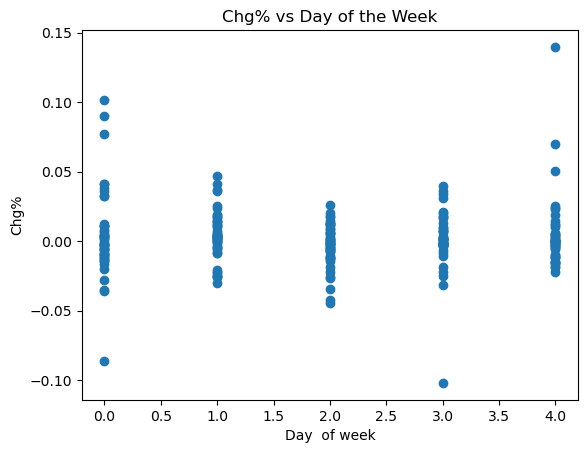

In [29]:
plt.scatter(df_IRCTC['DayOfWeek'] , df_IRCTC['Chg%'])
plt.xlabel('Day  of week')
plt.ylabel('Chg%')
plt.title('Chg% vs Day of the Week')
plt.show()

***Data Exploration: Load the data available in “thyroid0387_UCI” worksheet. Perform the 
following tasks***

In [31]:
thyroid_df = pd.read_excel("./Lab Session Data.xlsx", sheet_name='thyroid0387_UCI')


In [32]:
numeric_columns = thyroid_df.select_dtypes(include=['number']).columns
categorical_columns = thyroid_df.select_dtypes(include=['object']).columns

print("Numeric Columns:", numeric_columns)
print()
print("Categorical Columns:", categorical_columns)

Numeric Columns: Index(['Record ID', 'age'], dtype='object')

Categorical Columns: Index(['sex', 'on thyroxine', 'query on thyroxine',
       'on antithyroid medication', 'sick', 'pregnant', 'thyroid surgery',
       'I131 treatment', 'query hypothyroid', 'query hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH measured', 'TSH',
       'T3 measured', 'T3', 'TT4 measured', 'TT4', 'T4U measured', 'T4U',
       'FTI measured', 'FTI', 'TBG measured', 'TBG', 'referral source',
       'Condition'],
      dtype='object')


In [33]:
thyroid_df.replace("?",np.nan,inplace = True)

C:\Users\yadav\AppData\Local\Temp\ipykernel_14196\1398544354.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  thyroid_df.replace("?",np.nan,inplace = True)


In [34]:
numeric_df = thyroid_df.select_dtypes(include=['number'])
numeric_df.head()

,Record ID,age,TSH,T3,TT4,T4U,FTI,TBG
0,840801013,29,0.3,NaN,NaN,NaN,NaN,NaN
1,840801014,29,1.6,1.9,128.0,NaN,NaN,NaN
2,840801042,41,NaN,NaN,NaN,NaN,NaN,11.0
3,840803046,36,NaN,NaN,NaN,NaN,NaN,26.0
4,840803047,32,NaN,NaN,NaN,NaN,NaN,36.0


In [35]:
#• Study the data range for numeric variables.

def getrange_emptycount(colname):
    print(colname,"range:", numeric_df[colname].max() - numeric_df[colname].min())
    print(colname,"emptycount:",numeric_df[colname].isnull().sum(),"\n")

In [36]:
for column in numeric_df.columns:
    getrange_emptycount(column)

Record ID range: 29318022
Record ID emptycount: 0 

age range: 65525
age emptycount: 0 

TSH range: 529.995
TSH emptycount: 842 

T3 range: 17.95
T3 emptycount: 2604 

TT4 range: 598.0
TT4 emptycount: 442 

T4U range: 2.16
T4U emptycount: 809 

FTI range: 879.6
FTI emptycount: 802 

TBG range: 199.9
TBG emptycount: 8823 



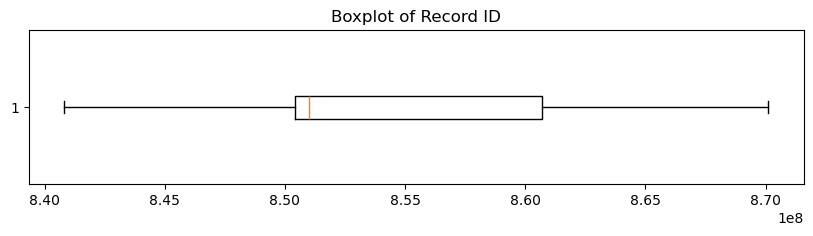

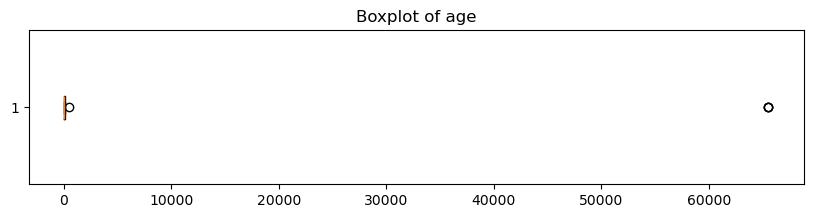

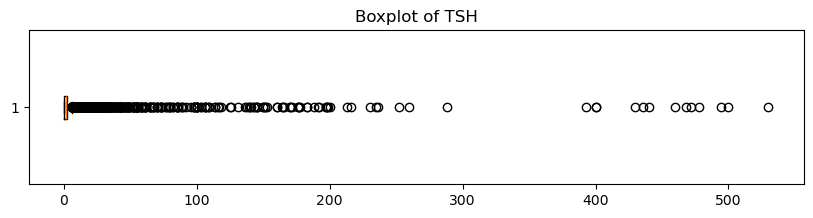

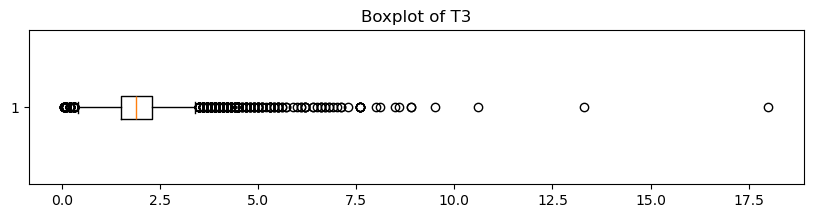

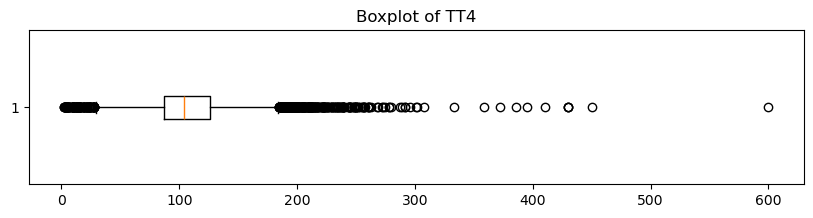

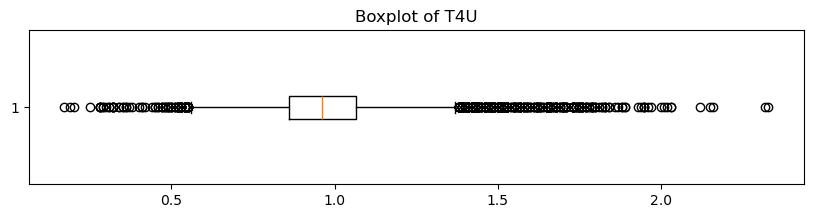

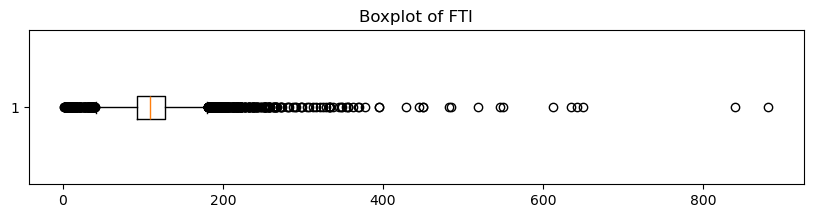

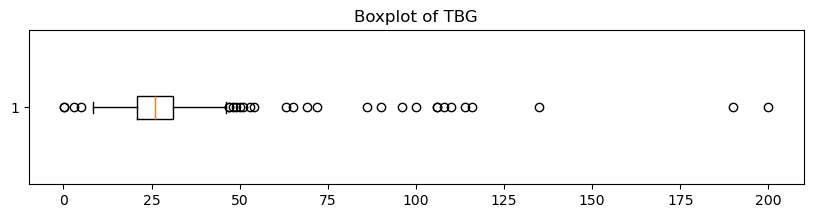

In [37]:
#• Study presence of outliers in data. 

for column in numeric_df:
    plt.figure(figsize=(10, 2))
    plt.boxplot(thyroid_df[column].dropna(), vert=False)
    plt.title(f"Boxplot of {column}")
    plt.show()

In [38]:
#• For numeric variables, calculate the mean and variance (or standard deviation).

def mean_variance(column):
    print(column,"\nmean:",numeric_df[column].mean(),"\nvariance:",numeric_df[column].var(),"\n")

In [39]:
for column in numeric_df.columns:
    mean_variance(column)

Record ID 
mean: 852947346.6122983 
variance: 57486250586150.34 

age 
mean: 73.55582206716092 
variance: 1401800.8688713463 

TSH 
mean: 5.218402753781513 
variance: 584.866153209295 

T3 
mean: 1.970628805724726 
variance: 0.7877961683561565 

TT4 
mean: 108.70030469644902 
variance: 1407.950791475491 

T4U 
mean: 0.9760557216309935 
variance: 0.04014430639006391 

FTI 
mean: 113.64074551935484 
variance: 1726.539585061158 

TBG 
mean: 29.87005729512894 
variance: 444.38764299946627 



***employ appropriate central tendencies to fill the missing values in the data 
variables. Employ following guidance.
• Mean may be used when the attribute is numeric with no outliers
• Median may be employed for attributes which are numeric and contain outliers
• Mode may be employed for categorical attributes***

In [41]:
#outlier presence
def check_present(df,column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    bound1 = q1-1.5*iqr
    bound2 = q3+1.5*iqr
    val =len(df[ (df[column]<bound1) | (df[column]>bound2) ])
    if val == 0:
        return False
    else:
        return True

In [69]:

for column in thyroid_df.columns:
    if thyroid_df[column].isnull().sum() > 0:
        if thyroid_df[column].dtype == 'object':
            thyroid_df[column].fillna(thyroid_df[column].mode()[0], inplace=True)
        else:
            if check_present(thyroid_df, column):  # assuming outliers present if unique values > 10
                thyroid_df[column].fillna(thyroid_df[column].median(), inplace=True)
            else:
                thyroid_df[column].fillna(thyroid_df[column].mean(), inplace=True)
thyroid_df.head()

,Record ID,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,...,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,Condition
0,840801013,29,F,f,f,f,f,f,f,f,...,f,104.0,f,0.96,f,109.0,f,26.0,other,NO CONDITION
1,840801014,29,F,f,f,f,f,f,f,f,...,t,128.0,f,0.96,f,109.0,f,26.0,other,NO CONDITION
2,840801042,41,F,f,f,f,f,f,f,f,...,f,104.0,f,0.96,f,109.0,t,11.0,other,NO CONDITION
3,840803046,36,F,f,f,f,f,f,f,f,...,f,104.0,f,0.96,f,109.0,t,26.0,other,NO CONDITION
4,840803047,32,F,f,f,f,f,f,f,f,...,f,104.0,f,0.96,f,109.0,t,36.0,other,S


***Data Normalization / Scaling: from the data study, identify the attributes which may need 
normalization. Employ appropriate normalization techniques to create normalized set of data***

In [44]:
def normalize(df,column):
    min_val = np.min(df[column])
    max_val = np.max(df[column])
    normalized_column = [(x - min_val) / (max_val - min_val) for x in df[column]]
    return normalized_column

numeric_columns = thyroid_df.select_dtypes(include=['number']).columns
# Normalize each numeric column
normalized_data = thyroid_df.copy()
for column in numeric_columns:
    normalized_data[column] = normalize(normalized_data,column)

# Display normalized data (or specific normalized columns)
normalized_data.head()

,Record ID,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,...,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,Condition
0,0.000000e+00,0.000427,F,f,f,f,f,f,f,f,...,f,0.170569,f,0.365741,f,0.122328,f,0.129565,other,NO CONDITION
1,3.410871e-08,0.000427,F,f,f,f,f,f,f,f,...,t,0.210702,f,0.365741,f,0.122328,f,0.129565,other,NO CONDITION
2,9.891527e-07,0.000610,F,f,f,f,f,f,f,f,...,f,0.170569,f,0.365741,f,0.122328,t,0.054527,other,NO CONDITION
3,6.934301e-05,0.000534,F,f,f,f,f,f,f,f,...,f,0.170569,f,0.365741,f,0.122328,t,0.129565,other,NO CONDITION
4,6.937712e-05,0.000473,F,f,f,f,f,f,f,f,...,f,0.170569,f,0.365741,f,0.122328,t,0.179590,other,S


***Similarity Measure: Take the first 2 observation vectors from the dataset. Consider only the 
attributes (direct or derived) with binary values for these vectors (ignore other attributes). Calculate 
the Jaccard Coefficient (JC) and Simple Matching Coefficient (SMC) between the document vectors. 
Use first vector for each document for this. Compare the values for JC and SMC and judge the 
appropriateness of each of them.***

In [46]:
#accessing two observation
binary_att = []
for column in thyroid_df.columns:
    if(len(pd.unique(thyroid_df[column])) == 2):
        binary_att.append(column)

binary_df = thyroid_df[binary_att]

for column in binary_df.columns:
    unilist1 = pd.unique(binary_df[column])
    unilist1.sort()
    newcolumn = [False if x == unilist1[0] else True for x in binary_df[column]]
    binary_df.loc[:,column] = newcolumn


vec1 = binary_df.iloc[0]
vec2 = binary_df.iloc[1]

vec = vec1 & vec2
f11 = sum(vec)
f01_f10 = sum(vec1 ^ vec2)
f00 = sum(~(vec1 | vec2))
JC = f11 / (f01_f10 + f11)
SMC = (f11+f00) / (f01_f10 + f11 + f00)
print("Jacard Coefficient is : ", JC)
print("Simple Matching Coefficient is : ", SMC)

Jacard Coefficient is :  0.25
Simple Matching Coefficient is :  0.8571428571428571


***Cosine Similarity Measure: Now take the complete vectors for these two observations (including 
all the attributes). Calculate the Cosine similarity between the documents by using the second 
feature vector for each document.***

In [51]:
import math
v1 = normalized_data.iloc[0]
v2 = normalized_data.iloc[1]

for x in vec1.index:
    v1[x] = 1 if vec1[x]== True else 0
    v2[x] = 1 if vec2[x]== True else 0
v1 = v1[1:-2]
v2 = v2[1:-2]
def cosine_similarity(v1,v2):
    dot_pro = sum([x*y for x,y in zip(v1,v2)])
    magv1 = getlen(v1)
    magv2 = getlen(v2)
    return dot_pro/(magv1*magv2)
def getlen(v):
    magv = math.sqrt(sum([x**2 for x in v]))
    return magv

print("cosine similarity measure:",cosine_similarity(v1,v2))

cosine similarity measure: 0.4548200422912813


C:\Users\yadav\AppData\Local\Temp\ipykernel_14196\27138102.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  v1[x] = 1 if vec1[x]== True else 0
C:\Users\yadav\AppData\Local\Temp\ipykernel_14196\27138102.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  v2[x] = 1 if vec2[x]== True else 0


***Heatmap Plot: Consider the first 20 observation vectors. Calculate the JC, SMC and COS 
between the pairs of vectors for these 20 vectors. Employ similar strategies for coefficient 
calculation as in A4 & A5. Employ a heatmap plot to visualize the similarities.***

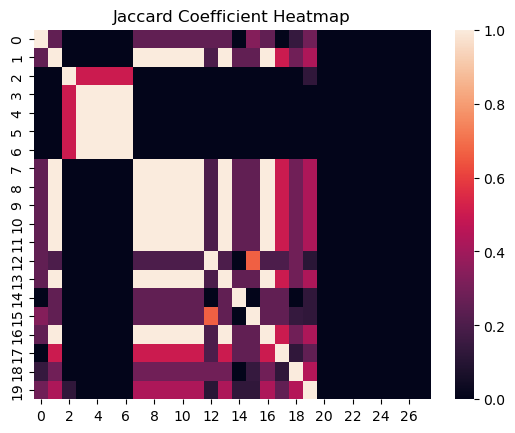

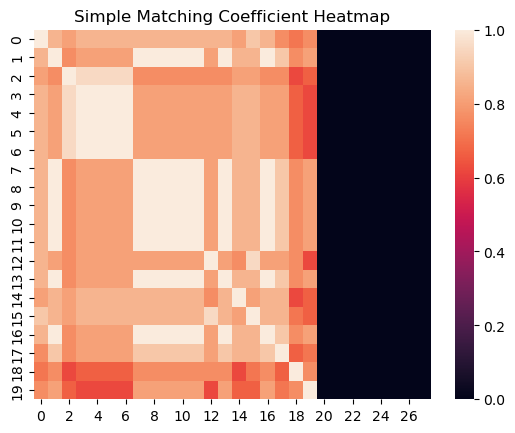

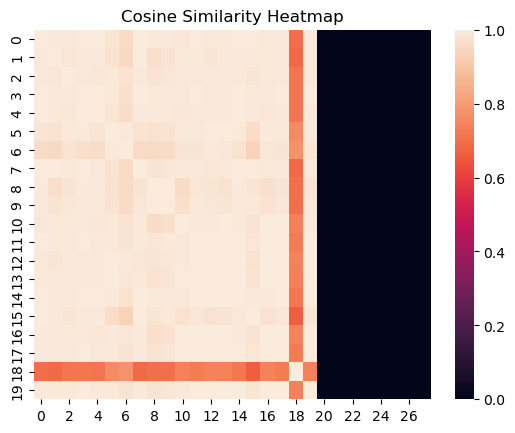

In [73]:
import seaborn as sns
# We are now going to calculate JC, SMC, and COS for the first 20 observation vectors

# Select the first 20 observations
subset_data = thyroid_df.iloc[:20,1:-2]

for i in range (0,20):
    for column in binary_df.columns:
        subset_data.loc[i,column] = 1 if binary_df.loc[i,column] == True else 0

# Initialize matrices for JC, SMC, and Cosine Similarity
jc_matrix = np.zeros((20, len(subset_data.columns)))
smc_matrix = np.zeros((20, len(subset_data.columns)))
cos_matrix = np.zeros((20, len(subset_data.columns)))

# Calculate JC, SMC, and COS for each pair of vectors
for i in range(20):
    for j in range(i, 20):
        vec1 = subset_data.loc[i,binary_att]
        vec2 = subset_data.loc[j,binary_att]
        
        # JC Calculation
        f11 = sum(vec1 & vec2)
        f01_f10 = sum( vec1 ^ vec2)

        
        denominator_jc = (f01_f10 + f11)
        if denominator_jc == 0:
            jc_matrix[i, j] = jc_matrix[j, i] = 0  # Symmetric matrix
        else:
            jc_matrix[i, j] = jc_matrix[j, i] = f11 / denominator_jc  # Symmetric matrix
        
        # SMC Calculation
        f00 = sum(~(vec1 | vec2))
        
        denominator_smc = (f00 + f01_f10 + f11)
        if denominator_smc == 0:
            smc_matrix[i, j] = smc_matrix[j, i] = 0  # Symmetric matrix
        else:
            smc_matrix[i, j] = smc_matrix[j, i] = (f11 + f00) / denominator_smc  # Symmetric matrix

        vec1 = subset_data.iloc[i]
        vec2 = subset_data.iloc[j]
        # Cosine Similarity Calculation
        cos_matrix[i, j] = cos_matrix[j, i] = cosine_similarity(vec1, vec2)  # Symmetric matrix

        
# Plot Heatmaps
sns.heatmap(jc_matrix)
plt.title('Jaccard Coefficient Heatmap')
plt.show()

sns.heatmap(smc_matrix)
plt.title('Simple Matching Coefficient Heatmap')
plt.show()

sns.heatmap(cos_matrix)
plt.title('Cosine Similarity Heatmap')
plt.show()